In [1]:
import numpy as np
import joblib

In [2]:
from utils.model import CLIP, UNET, VAE
from utils.data import locations3, objects3
from utils.plot import plot
from utils.vector import interp_gpu
from utils.show import grid, flipbook, single

In [3]:
clip = CLIP()
umap = joblib.load('dump/umap_cosine.sav')

2024-01-13 20:01:41.119226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 20:01:41.119265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 20:01:41.120841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 20:01:58.780158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
prompts = np.array([[f'A {y} {x}', y, x] for x in locations3 for y in objects3])
prompts

array([['A monkey ', 'monkey', ''],
       ['A child ', 'child', ''],
       ['A car ', 'car', ''],
       ['A monkey on the moon', 'monkey', 'on the moon'],
       ['A child on the moon', 'child', 'on the moon'],
       ['A car on the moon', 'car', 'on the moon'],
       ['A monkey in the jungle', 'monkey', 'in the jungle'],
       ['A child in the jungle', 'child', 'in the jungle'],
       ['A car in the jungle', 'car', 'in the jungle'],
       ['A monkey at the beach', 'monkey', 'at the beach'],
       ['A child at the beach', 'child', 'at the beach'],
       ['A car at the beach', 'car', 'at the beach']], dtype='<U22')

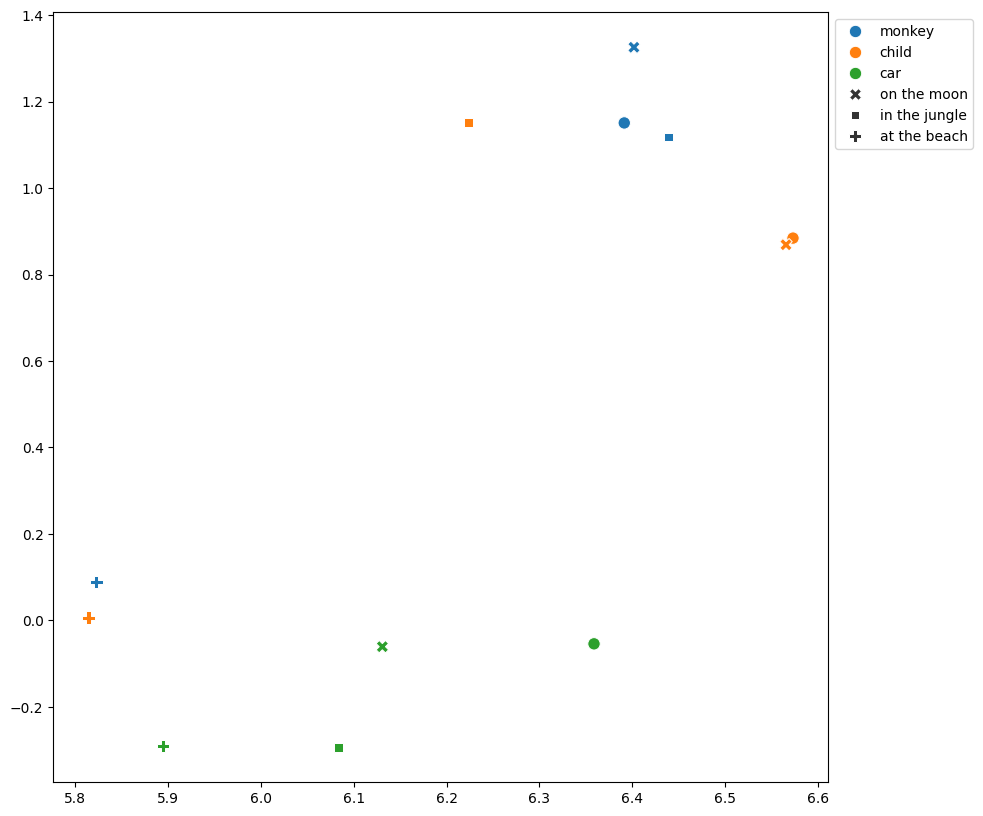

In [5]:
e = clip.embed(list(prompts[:,0]), pooled=True)
r1 = umap.transform(e.cpu())
plot(r1, meta=prompts)

In [6]:
#i =[6,9] # monkey
i = [8,11] # car 

In [7]:
prompts[i[0]]

array(['A car in the jungle', 'car', 'in the jungle'], dtype='<U22')

In [8]:
prompts[[i[1]]]

array([['A car at the beach', 'car', 'at the beach']], dtype='<U22')

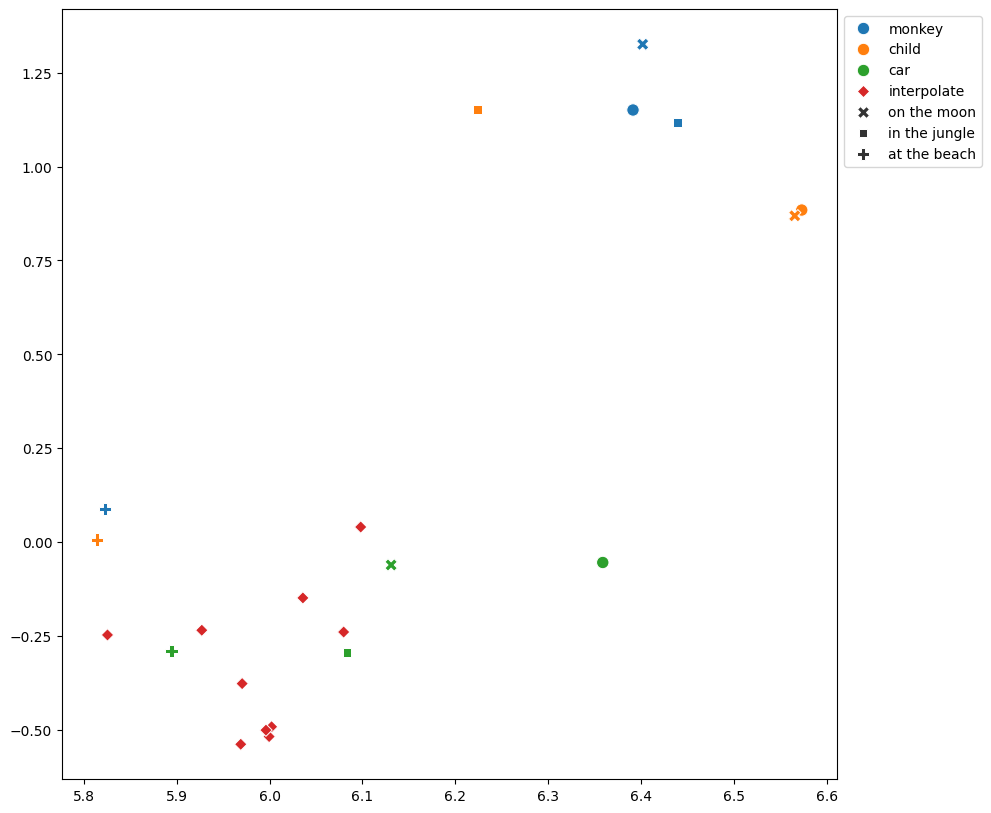

In [9]:
steps = 10

interp = interp_gpu(e[i[0]], e[i[1]], steps)
interp = interp.squeeze().cpu()
r2 = umap.transform(interp)
data = np.concatenate((r1,r2))
meta = np.concatenate((prompts, [['', 'interpolate', 'interpolate']]*steps))
plot(data, meta=meta)

In [10]:
unet = UNET()
vae = VAE()

In [11]:
#cherry_picked = ['A artistic photograph of a centered young lion baby cub in laying in the savannah', 'A artistic photograph of a centered adult lion laying in the savannah']  # prompts for the presentation
cherry_picked = ['A photo of a old wood house in the woods', 'A photo of a mordern wood house in the woods']
steps = 50

clip_latents = clip.embed([prompts[i[0]][0], prompts[i[1]][0]])
#$clip_latents = clip.embed(cherry_picked) # prompts for the presentation
vae_latents = unet.itterate(interp_gpu(clip_latents[0], clip_latents[1], steps))

  0%|          | 0/26 [00:00<?, ?it/s]

/pfs/data5/home/kn/kn_kn/kn_pop531500/venv/lib64/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Attempt to open cnn_infer failed: handle=0 error: libcudnn_cnn_infer.so.8: cannot open shared object file: No such file or directory (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:78.)
  return F.conv2d(input, weight, bias, self.stride,


In [12]:
out = vae.d(vae_latents)

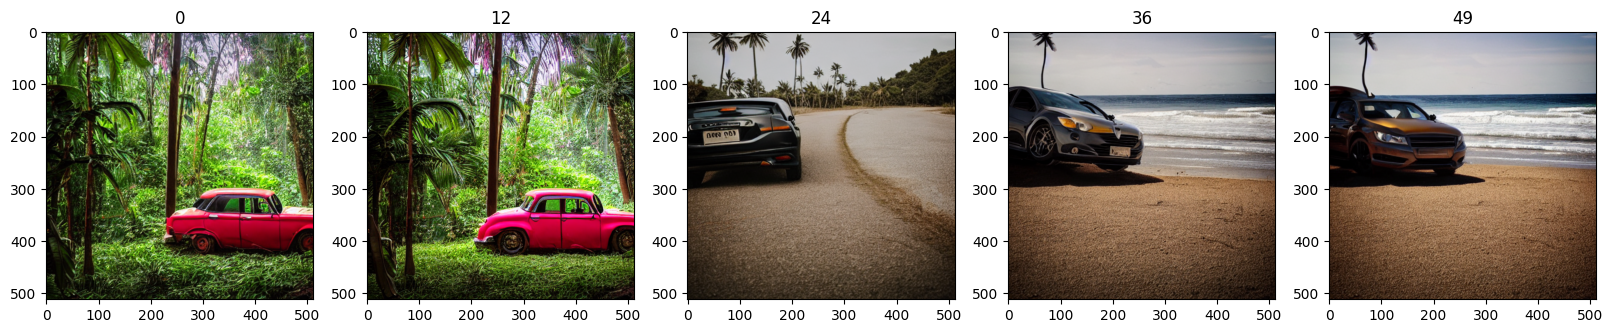

In [13]:
grid(out, 5)

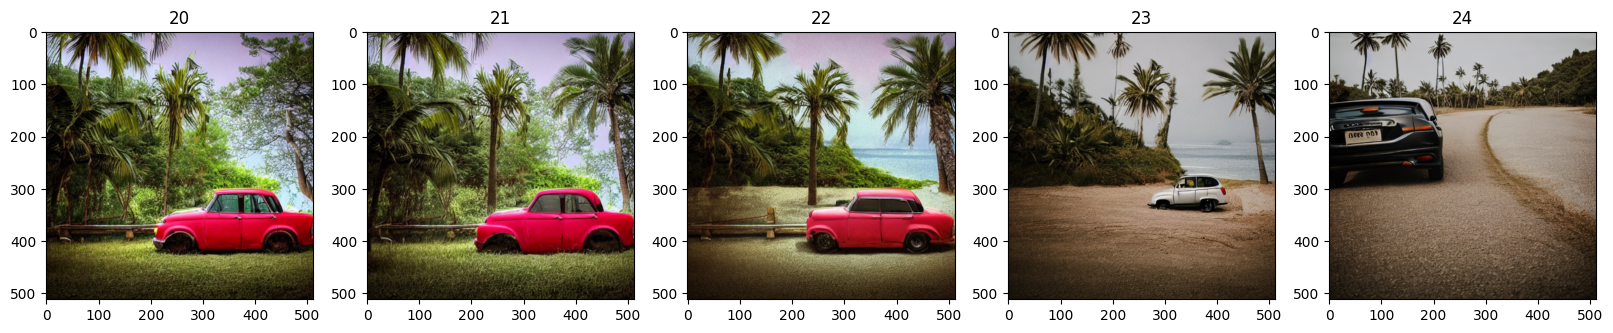

In [19]:
grid(out, 5, (20,24))

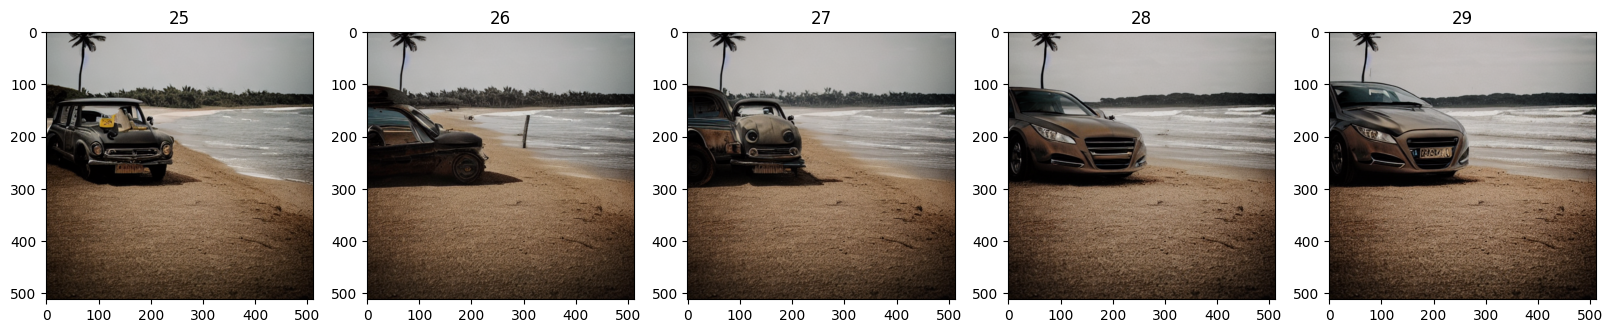

In [18]:
grid(out, 5, (25,29))

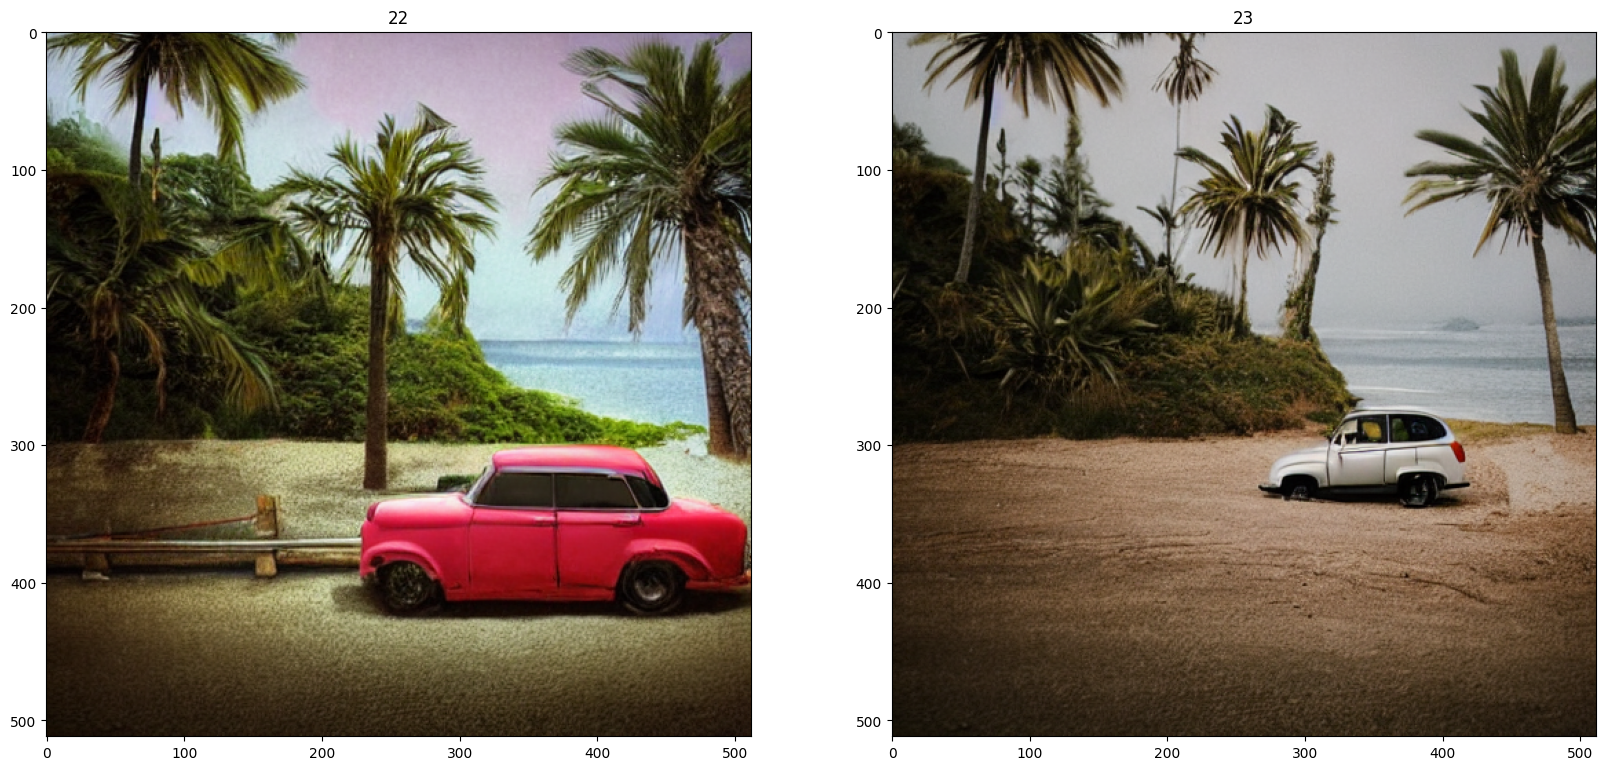

In [22]:
grid(out, 2, (22,23))

In [16]:
# single(out[32])

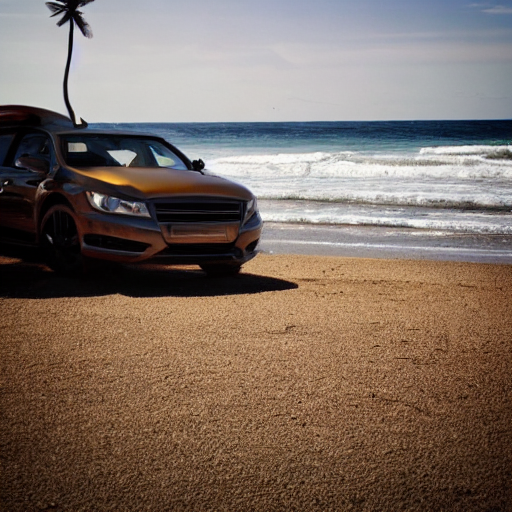

In [17]:
flipbook(out)